<a href="https://colab.research.google.com/github/Jass1313c/comp215/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime, json, requests
from pprint import pprint

param = { "format": "geojson", "starttime": "2024-03-10","limit": 20000, "endtime": "2024-05-30"}
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
response = requests.get(url, params=param)
data = json.loads(response.text)

pprint(data)

for feature in data['features']:
  depth = feature['geometry']['coordinates'][2]
  if depth < 10 and "Texas" in feature['properties']['place']:
    Latitude = feature['geometry']['coordinates'][1]
    Longitude = feature['geometry']['coordinates'][0]
    print(f"Mag: {feature['properties']['mag']},   Place: {feature['properties']['place']},   Time: {datetime.datetime.fromtimestamp(feature['properties']['time'] / 1000)},   Lat: {Latitude},   Long: {Longitude}")

In [ ]:
import datetime, json, requests
from pprint import pprint
import pyproj

param = { "format": "geojson", "starttime": "2024-03-14","limit": 20000, "endtime": "2024-06-15", "minmagnitude": 1}
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
response = requests.get(url, params=param)
data = json.loads(response.text)

count = 0
earthquake_data = []

for feature in data['features']:
  depth = feature['geometry']['coordinates'][2]
  if depth < 10 and "Texas" in feature['properties']['place']:
    count += 1

    time = datetime.datetime.fromtimestamp(feature['properties']['time'] / 1000)

    earthquake_data.append({
      "Mag": feature['properties']['mag'],
      "Place": feature['properties']['place'],
      "Time": time,
      "Lat": feature['geometry']['coordinates'][1],
      "Long": feature['geometry']['coordinates'][0],
      "Depth": depth
    })

pprint(earthquake_data)
pprint(f"Count: {count}")

In [3]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pyproj

file_path = '/content/drive/MyDrive/Fracking.csv'
fracking_df = pd.read_csv(file_path)

#Converting coordinate systems to WGS84
source_crs = 'epsg:4269'  # NAD83
target_crs = 'epsg:4326'  # WGS84

pd.set_option('display.max_rows', None)

transformer = pyproj.Transformer.from_crs(source_crs, target_crs)

fracking_df['Latitude_WGS84'], fracking_df['Longitude_WGS84'] = transformer.transform(fracking_df['Latitude'].values, fracking_df['Longitude'].values)

#convert jobstart date into datetime object
fracking_df['JobStartDate'] = pd.to_datetime(fracking_df['JobStartDate'])

#convert jobend date into datetime object
fracking_df['JobEndDate'] = pd.to_datetime(fracking_df['JobEndDate'])

display(fracking_df[['JobStartDate','JobEndDate']])


In [65]:
filtered_fracking_df = fracking_df[ (fracking_df['Longitude_WGS84'] >= -104.05) & (fracking_df['Longitude_WGS84'] <= -103.85)]

# Get the latitudes and longitudes of the filtered fracking sites
frac_lats = filtered_fracking_df['Latitude_WGS84'].tolist()
frac_lons = filtered_fracking_df['Longitude_WGS84'].tolist()
frac_counties = filtered_fracking_df['CountyName'].tolist()

# Print the coordinates
for lat, lon, county in zip(frac_lats, frac_lons, frac_counties):
    print(f"Latitude: {lat},      Longitude: {lon},      County: {county}")

Latitude: 31.569435,      Longitude: -103.89958,      County: Reeves
Latitude: 31.569435,      Longitude: -103.89964,      County: Reeves
Latitude: 31.569435,      Longitude: -103.89977,      County: Reeves


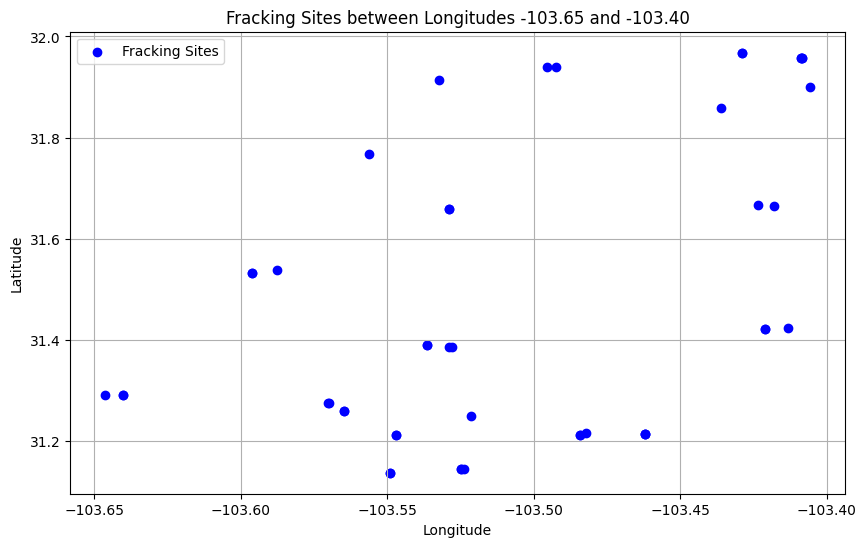

In [55]:
import matplotlib.pyplot as plt

# Assuming you have already filtered the DataFrame as described in the previous response:
# filtered_fracking_df = fracking_df[(fracking_df['Longitude_WGS84'] >= -103.65) & (fracking_df['Longitude_WGS84'] <= -103.40)]

# Get the latitudes and longitudes of the filtered fracking sites
frac_lats = filtered_fracking_df['Latitude_WGS84'].tolist()
frac_lons = filtered_fracking_df['Longitude_WGS84'].tolist()

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(frac_lons, frac_lats, color='blue', label='Fracking Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fracking Sites between Longitudes -103.65 and -103.40')
plt.grid(True)
plt.legend()
plt.show()

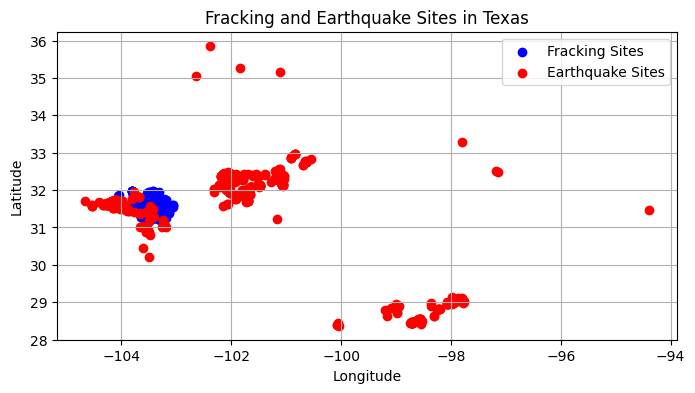

In [39]:
import matplotlib.pyplot as plt

frac_lats = fracking_df['Latitude_WGS84'].tolist()
frac_lons = fracking_df['Longitude_WGS84'].tolist()


eq_lats = [eq['Lat'] for eq in earthquake_data]
eq_lons = [eq['Long'] for eq in earthquake_data]

plt.figure(figsize=(10, 6))


plt.scatter(frac_lons, frac_lats, color='blue', label='Fracking Sites')

plt.scatter(eq_lons, eq_lats, color='red', label='Earthquake Sites')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fracking and Earthquake Sites in Texas')
plt.grid(True)
plt.legend()
plt.show()

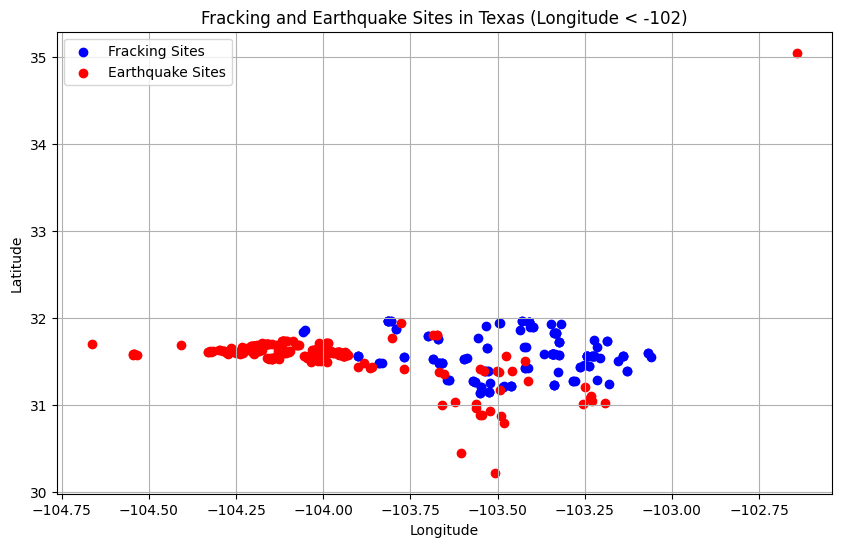

In [46]:
filtered_earthquake_data = [eq for eq in earthquake_data if eq['Long'] < -102.5]
import matplotlib.pyplot as plt

frac_lats = fracking_df['Latitude_WGS84'].tolist()
frac_lons = fracking_df['Longitude_WGS84'].tolist()

eq_lats = [eq['Lat'] for eq in filtered_earthquake_data]
eq_lons = [eq['Long'] for eq in filtered_earthquake_data]

plt.figure(figsize=(10, 6))
plt.scatter(frac_lons, frac_lats, color='blue', label='Fracking Sites')
plt.scatter(eq_lons, eq_lats, color='red', label='Earthquake Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fracking and Earthquake Sites in Texas (Longitude < -102)')
plt.grid(True)
plt.legend()
plt.show()

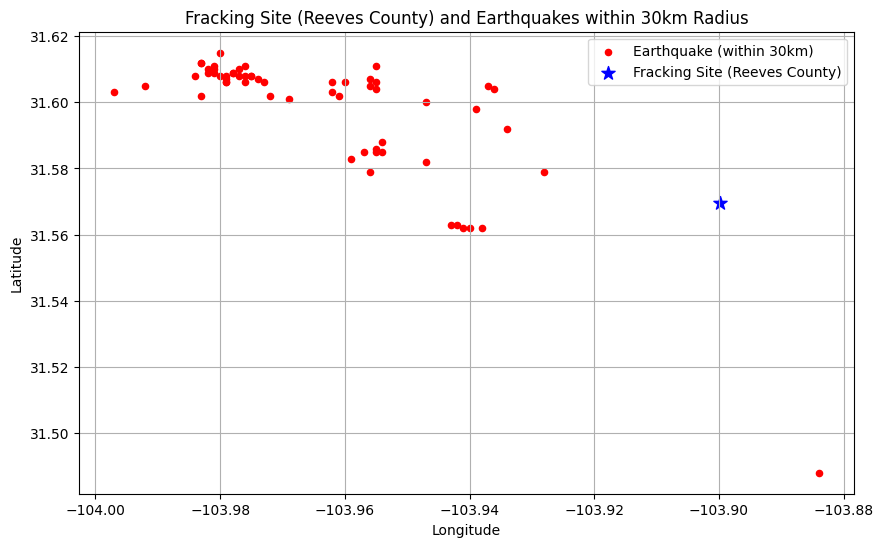

In [80]:
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Fracking site coordinates
frac_site = (31.569435, -103.89977)  # Reeves County

# Function to calculate distance
def distance(point1, point2):
    return geodesic(point1, point2).kilometers

# Create figure and axes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot fracking site
ax.scatter(frac_site[1], frac_site[0], color='blue', marker='*', s=100, label='Fracking Site (Reeves County)')

# Plot earthquakes within 30km radius
for eq in earthquake_data:
    eq_coords = (eq['Lat'], eq['Long'])
    if distance(frac_site, eq_coords) <= 10:
        ax.scatter(eq['Long'], eq['Lat'], color='red', marker='o', s=20, label='Earthquake (within 30km)')

# Customize plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Fracking Site (Reeves County) and Earthquakes within 30km Radius')
ax.grid(True)

# Adjust legend to avoid duplicate labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
ax.legend(unique_handles, unique_labels, loc='best')

plt.show()